/usr/lib/python3/dist-packages/requests/__init__.py:87: RequestsDependencyWarning: urllib3 (2.0.4) or chardet (4.0.0) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


[bnlearn] >Warning: Computing DAG with 14 nodes can take a very long time!
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


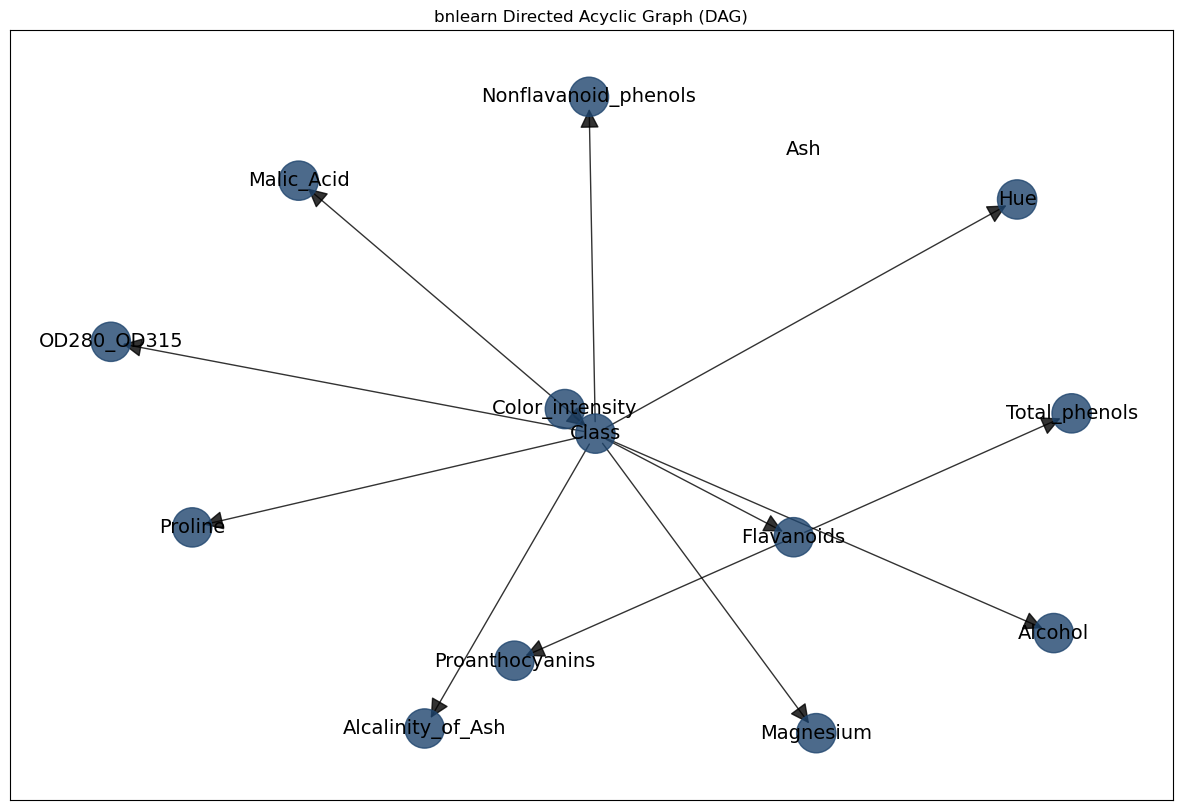

[bnlearn] >Warning: Computing DAG with 14 nodes can take a very long time!
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of Flavanoids:
+---------------+----------+
| Flavanoids(0) | 0.25241  |
+---------------+----------+
| Flavanoids(1) | 0.249781 |
+---------------+----------+
| Flavanoids(2) | 0.250657 |
+---------------+----------+
| Flavanoids(3) | 0.247152 |
+---------------+----------+
[bnlearn] >CPD of Total_phenols:
+------------------+-----+---------------------+
| Flavanoids       | ... | Flavanoids(3)       |
+------------------+-----+---------------------+
| Total_phenols(0) | ... | 0.22163120567375885 |
+------------------+-----+---------------------+
| Total

100%|██████████| 36/36 [00:00<00:00, 229.39it/s]

Accuracy: 0.9166666666666666


In [2]:
import pandas as pd
import bnlearn as bn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the data
data = pd.read_csv('wine.csv')

# Define column names
column_names = ['Class', 'Alcohol', 'Malic_Acid', 'Ash', 'Alcalinity_of_Ash', 
                'Magnesium', 'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols', 
                'Proanthocyanins', 'Color_intensity', 'Hue', 'OD280_OD315', 'Proline']
data.columns = column_names

# Discretize the data
discretized_data = data.copy()
for col in data.columns[1:]:
    discretized_data[col] = pd.qcut(data[col], 4, labels=False, duplicates='drop')


structure1 = bn.structure_learning.fit(discretized_data)

bn.plot(structure1)
# Learn the structure
X = discretized_data.drop('Class', axis=1)
y = discretized_data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Split the dataset into training and test sets
train_set = pd.concat([X_train,y_train],axis=1)
test_set = pd.concat([X_test,y_test],axis=1)

model = bn.structure_learning.fit(train_set, methodtype="hc")
model_A = bn.parameter_learning.fit(model, train_set)

new_test = X_test.drop('Ash',axis=1)


# Perform predictions on the test set
y_pred = bn.predict(model_A, new_test, variables='Class')

# Print the predicted values
# print(y_pred['Class'])
# print(y_test)
# # Calculate accuracy
# for i in y_pred:
#     print(i)
accuracy = accuracy_score(y_test, y_pred['Class'])
print(f"Accuracy: {accuracy}")


In [3]:
#Probability Distribution
import matplotlib.pyplot as plt
import numpy as np

X1 = np.zeros((3,3))
X2 = np.zeros((3,3))
X3 = np.zeros((3,3))
for i in range(1,4):
    for j in range(1,4):
        predictions = bn.inference.fit(model_A, variables=['Class'], evidence ={'Flavanoids': i, 'Proline': j})
        X1[i-1][j-1], X2[i-1][j-1], X3[i-1][j-1] = predictions.values[0], predictions.values[1],predictions.values[2] 
F1, F2 = np.meshgrid([0, 1, 2], [0, 1, 2])
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(131,projection='3d')
ax1.plot_surface(F1,F2,X1,label='class1')
ax1.set_xlabel('Flavanoids')
ax1.set_ylabel('Proline')
ax1.set_zlabel('Probability')
ax1.set_title('Probability Distribution of class 1')

ax2 = fig.add_subplot(132,projection='3d')
ax2.plot_surface(F1,F2,X2,label='class2')
ax2.set_xlabel('Flavanoids')
ax2.set_ylabel('Proline')
ax2.set_zlabel('Probability')
ax2.set_title('Probability Distribution of class 2')

ax3 = fig.add_subplot(133,projection='3d')
ax3.plot_surface(F1,F2,X3,label='class3')
ax3.set_xlabel('Flavanoids')
ax3.set_ylabel('Proline')
ax3.set_zlabel('Probability')
ax3.set_title('Probability Distribution of class 3')

fig.tight_layout()
plt.show()

[bnlearn] >Warning: Computing DAG with 14 nodes can take a very long time!
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


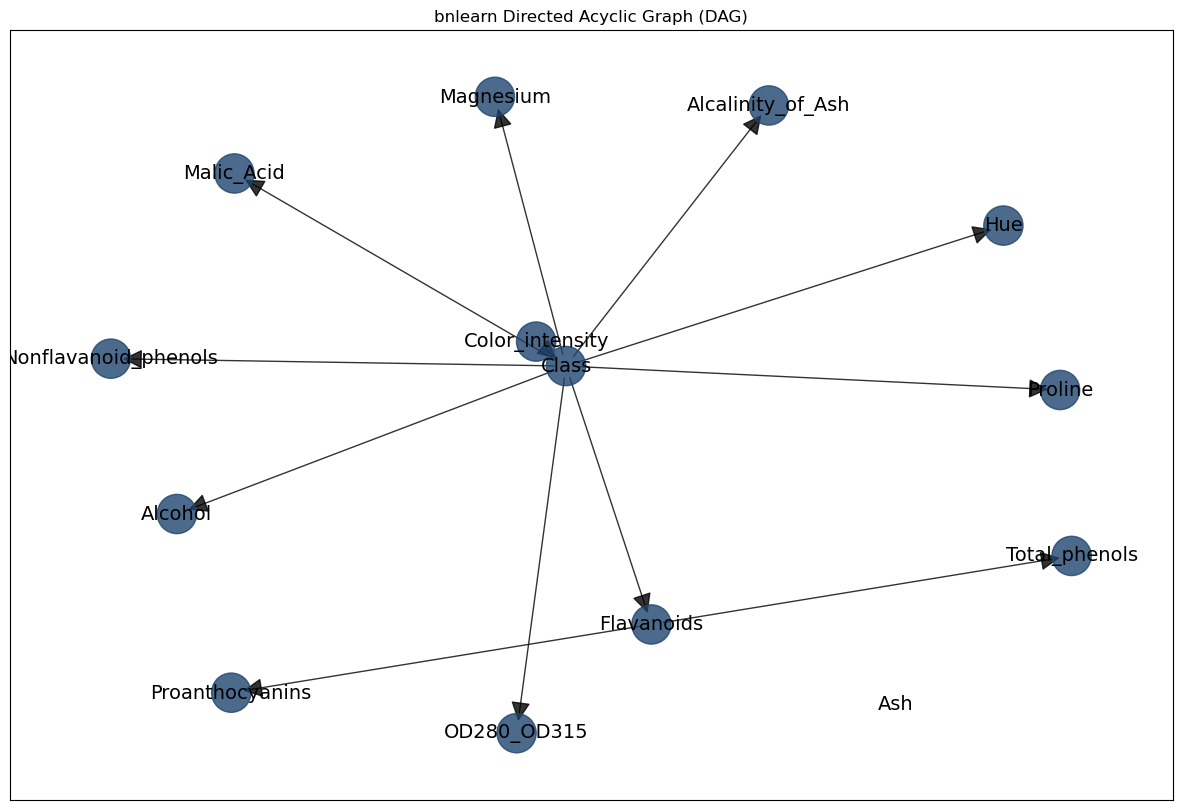

[bnlearn] >Compute edge strength with [chi_square]
[bnlearn] >Set node properties.
[bnlearn]> Set edge weights based on the [chi_square] test statistic.
[bnlearn] >Converting source-target into adjacency matrix..
[bnlearn] >Making the matrix symmetric..
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model
[bnlearn] >Existing coordinates from <pos> are used.


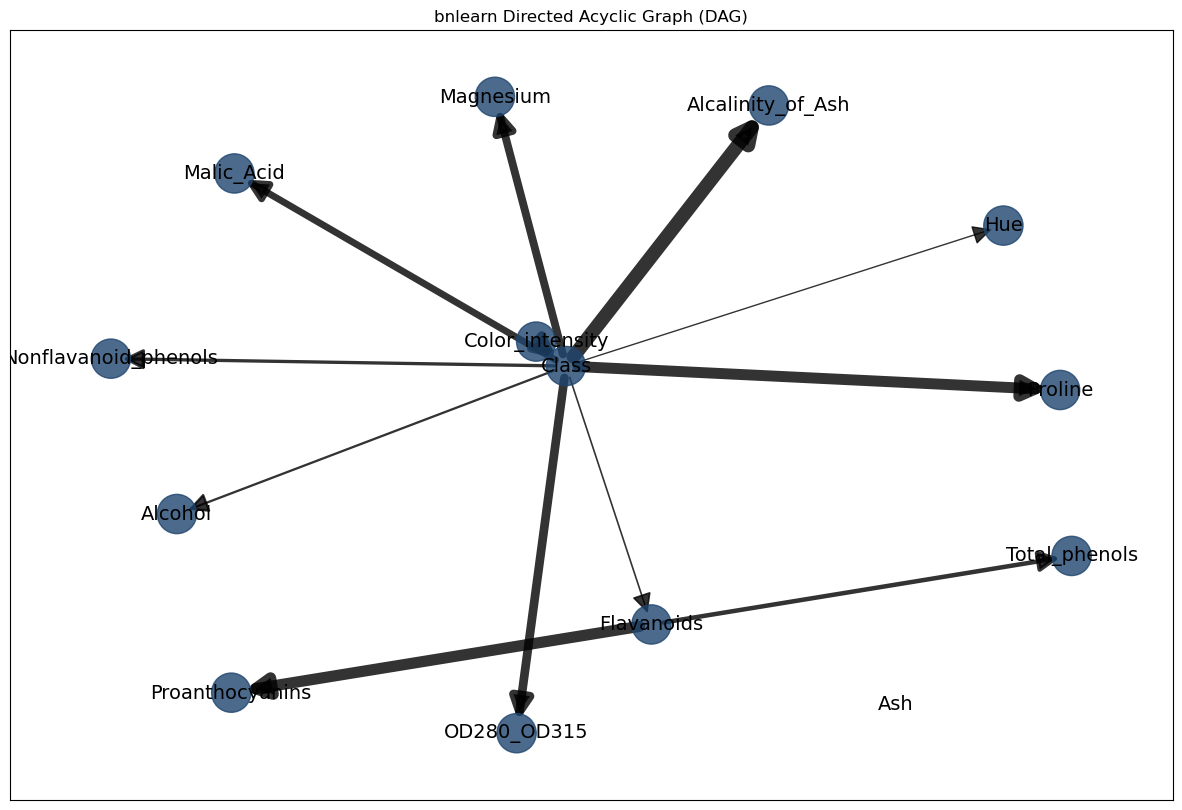

    source           target                stat_test        p_value    chi_square    dof
--  ---------------  --------------------  -----------  -----------  ------------  -----
 0  Class            Flavanoids            True         2.76136e-39      194.535       6
 1  Class            Proline               True         1.68901e-32      162.572       6
 2  Class            OD280_OD315           True         2.5545e-27       138.074       6
 3  Class            Hue                   True         2.10061e-25      128.987       6
 4  Class            Alcohol               True         6.96557e-23      116.995       6
 5  Class            Alcalinity_of_Ash     True         1.72727e-12       66.945       6
 6  Class            Malic_Acid            True         7.33944e-15       78.4857      6
 7  Class            Magnesium             False        4.99726e-11       59.7764      6
 8  Class            Nonflavanoid_phenols  False        2.10021e-10       56.7009      6
 9  Flavanoids       

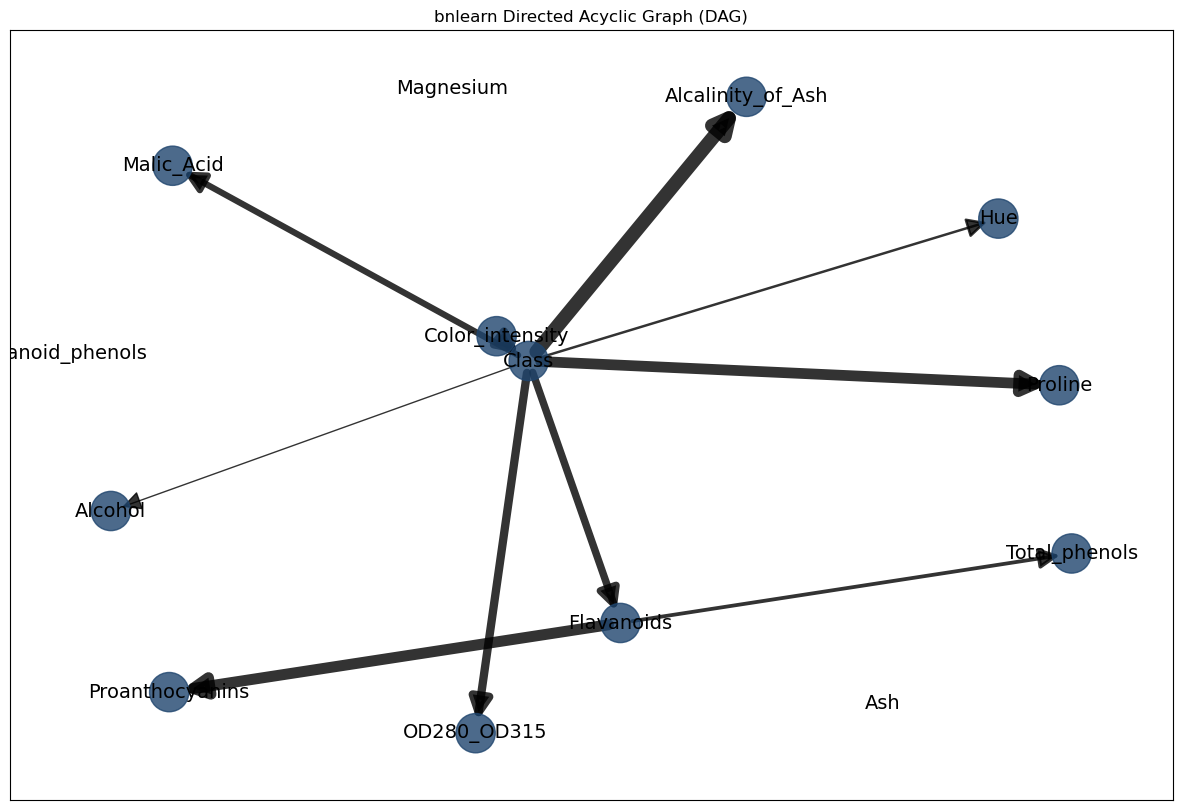

{'fig': <Figure size 1500x1000 with 1 Axes>,
 'ax': <Figure size 1500x1000 with 1 Axes>,
 'pos': {'Class': array([-0.05829055,  0.16157118]),
  'Alcohol': array([-0.86334506, -0.28039918]),
  'Malic_Acid': array([-0.74441756,  0.73678686]),
  'Ash': array([ 0.62451678, -0.84793107]),
  'Alcalinity_of_Ash': array([0.36144955, 0.93986162]),
  'Magnesium': array([-0.20539926,  0.96567914]),
  'Total_phenols': array([ 0.98787316, -0.40558044]),
  'Flavanoids': array([ 0.11844528, -0.61030839]),
  'Nonflavanoid_phenols': array([-1.        ,  0.18361771]),
  'Proanthocyanins': array([-0.75097342, -0.81402624]),
  'Color_intensity': array([-0.12005091,  0.234595  ]),
  'Hue': array([0.84668414, 0.58106902]),
  'OD280_OD315': array([-0.16052738, -0.93502022]),
  'Proline': array([0.96403522, 0.09008502])},
 'G': <networkx.classes.digraph.DiGraph at 0x7f0c608d7580>,
 'node_properties': {'Class': {'node_color': '#1f456e', 'node_size': 800},
  'Alcohol': {'node_color': '#1f456e', 'node_size': 800

In [4]:
from tabulate import tabulate

model = bn.structure_learning.fit(discretized_data, methodtype='hc', scoretype='bic')
G = bn.plot(model)

modelA = bn.independence_test(model, discretized_data, alpha=0.5e-11, prune=False)
bn.plot(modelA, pos=G['pos'])

print(tabulate(modelA['independence_test'], headers="keys"))

modelB = bn.independence_test(model, discretized_data, alpha=0.5e-11, prune=True)
bn.plot(modelB, pos=G['pos'])

In [5]:
from tabulate import tabulate
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd
import bnlearn as bn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the data
data = pd.read_csv('wine.csv')

# Define column names
column_names = ['Class', 'Alcohol', 'Malic_Acid', 'Ash', 'Alcalinity_of_Ash', 
                'Magnesium', 'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols', 
                'Proanthocyanins', 'Color_intensity', 'Hue', 'OD280_OD315', 'Proline']
data.columns = column_names

# Discretize the data
discretized_data = data.copy()
for col in data.columns[1:]:
    discretized_data[col] = pd.qcut(data[col], 4, labels=False, duplicates='drop')

edges_remove = ['Magnesium', 'Nonflavanoid_phenols']
pruned_data = discretized_data.drop(columns=edges_remove,axis=1)

PX = pruned_data.drop('Class', axis=1)
Py = pruned_data['Class']
PX_train, PX_test, Py_train, Py_test = train_test_split(PX, Py, test_size=0.3, random_state=42)

Ptrain_set = pd.concat([PX_train,Py_train],axis=1)
Ptest_set = pd.concat([PX_test,Py_test],axis=1)

Pmodel = bn.structure_learning.fit(Ptrain_set, methodtype="hc")
model_P = bn.parameter_learning.fit(Pmodel, Ptrain_set)

new_prune_test = PX_test.drop('Ash',axis=1)

# Perform predictions on the test set
Py_pred = bn.predict(model_P, new_prune_test, variables='Class')

# Print the predicted values
# print(y_pred['Class'])
# print(y_test)
# # Calculate accuracy
# for i in y_pred:
#     print(i)
Accuracy = accuracy_score(Py_test, Py_pred['Class'])
print(f"Accuracy: {Accuracy}")




[bnlearn] >Warning: Computing DAG with 12 nodes can take a very long time!
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of Malic_Acid:
+---------------+----------+
| Malic_Acid(0) | 0.251113 |
+---------------+----------+
| Malic_Acid(1) | 0.253785 |
+---------------+----------+
| Malic_Acid(2) | 0.247551 |
+---------------+----------+
| Malic_Acid(3) | 0.247551 |
+---------------+----------+
[bnlearn] >CPD of Class:
+------------+---------------------+-----+---------------------+
| Malic_Acid | Malic_Acid(0)       | ... | Malic_Acid(3)       |
+------------+---------------------+-----+---------------------+
| Class(1)   | 0.32033096926713944 | ... | 0.31055155875299756 |


100%|██████████| 54/54 [00:00<00:00, 269.49it/s]

Accuracy: 0.9444444444444444
